#Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix , classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_excel("customer_churn_large_dataset.xlsx")

# EDA ( Exploratoy Data Analysis )

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [6]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [7]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [9]:
# Using label encoder to transform categorical features into numbers
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Location'] = label_encoder.fit_transform(df['Location'])

In [10]:
df.drop(["Name"] ,axis =1 , inplace =True)

In [11]:
df.head()

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,63,1,2,17,73.36,236,0
1,2,62,0,4,1,48.76,172,0
2,3,24,0,2,5,85.47,460,0
3,4,36,0,3,3,97.94,297,1
4,5,46,0,3,19,58.14,266,0


#### PLotting a correlation heatmap
To see how the features correlate with each other .

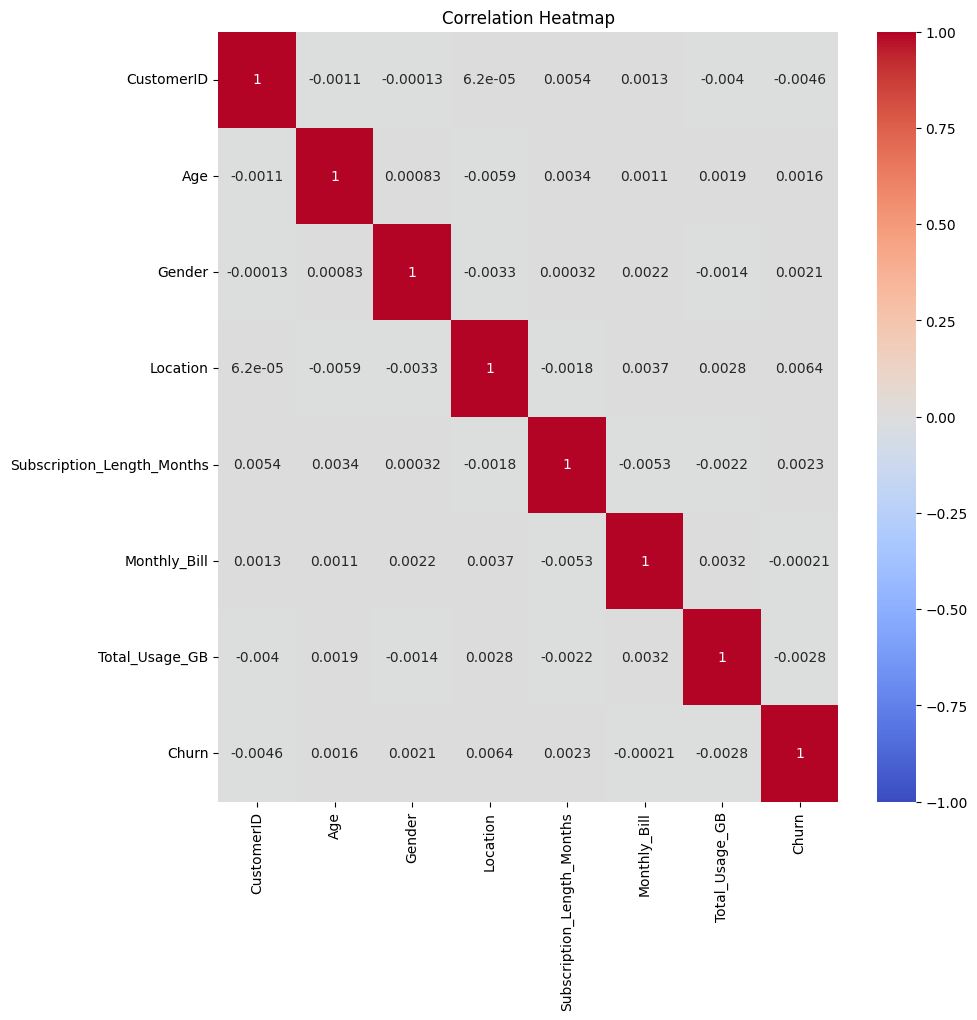

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

 We can see from the above plot that none of the features contribute to the Churn and are not correlated to each other .

##Building a BASE MODEL...

In [13]:
X = df.drop("Churn", axis=1)
y = df.Churn.values

# Split the data into training and testing sets and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.49
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      7542
           1       0.49      0.47      0.48      7458

    accuracy                           0.49     15000
   macro avg       0.49      0.49      0.49     15000
weighted avg       0.49      0.49      0.49     15000



##HYPERPARAMETER TUNING OF BASE MODEL.

In [16]:
rf_grid = {"n_estimators": np.arange(10 ,30 ,50 ),
           "min_samples_split": np.arange(2 ,5 ,10,),
           "min_samples_leaf": np.arange(1 ,2 ,3 ),
           "max_features": ["sqrt" , "log2"],
           "max_samples": [5000, 10000]}

# Using Randomized search CV to search for the best parameters...
rs_model = RandomizedSearchCV(RandomForestClassifier(n_jobs = -1),
                              param_distributions=rf_grid,
                              n_iter=5,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train);

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [17]:
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'sqrt'}

Predicting and evaluating using the best parameter model

In [18]:
y_pred_ht = rs_model.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred_ht)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_ht))

Accuracy: 0.50
              precision    recall  f1-score   support

           0       0.50      0.62      0.55      7542
           1       0.49      0.37      0.42      7458

    accuracy                           0.50     15000
   macro avg       0.49      0.50      0.49     15000
weighted avg       0.49      0.50      0.49     15000



Since the accuracy didn't improve ...
I decided to try a different number of models.
* Building a function to evaluate and train different tyeps of model.
* Evaluating results of the models .

In [20]:
def evaluate_classification_model(model, X_train, y_train, X_valid, y_valid):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)

    metrics = {
        "Training Accuracy": accuracy_score(y_train, train_preds),
        "Validation Accuracy": accuracy_score(y_valid, val_preds),
        "Training Precision": precision_score(y_train, train_preds),
        "Validation Precision": precision_score(y_valid, val_preds),
        "Training Recall": recall_score(y_train, train_preds),
        "Validation Recall": recall_score(y_valid, val_preds),
        "Training F1 Score": f1_score(y_train, train_preds),
        "Validation F1 Score": f1_score(y_valid, val_preds),
        "Confusion Matrix (Validation)": confusion_matrix(y_valid, val_preds)
    }

    return metrics

In [21]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression() ,
    "KNeighborsClassifier" : KNeighborsClassifier() ,
    "BalancedBaggingClassifier" : BalancedBaggingClassifier()
}
model_scores= {}
#fitting the function and training above models .
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    scores = evaluate_classification_model(model, X_train, y_train, X_valid, y_valid)
    print(scores)
    print("=" * 50)
    model.fit(X_train, y_train)
    model_scores[model_name] = model.score(X_test, y_test)

Evaluating Decision Tree...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


{'Training Accuracy': 1.0, 'Validation Accuracy': 0.49266666666666664, 'Training Precision': 1.0, 'Validation Precision': 0.49266666666666664, 'Training Recall': 1.0, 'Validation Recall': 1.0, 'Training F1 Score': 1.0, 'Validation F1 Score': 0.6601161232693167, 'Confusion Matrix (Validation)': array([[   0, 7610],
       [   0, 7390]])}
Evaluating Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


{'Training Accuracy': 1.0, 'Validation Accuracy': 0.49506666666666665, 'Training Precision': 1.0, 'Validation Precision': 0.4932013006207508, 'Training Recall': 1.0, 'Validation Recall': 0.9031123139377537, 'Training F1 Score': 1.0, 'Validation F1 Score': 0.6379887200076474, 'Confusion Matrix (Validation)': array([[ 752, 6858],
       [ 716, 6674]])}
Evaluating Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Training Accuracy': 0.5057714285714285, 'Validation Accuracy': 0.5073333333333333, 'Training Precision': 0.5055362749958685, 'Validation Precision': 0.0, 'Training Recall': 0.43786321605450745, 'Validation Recall': 0.0, 'Training F1 Score': 0.4692725431841193, 'Validation F1 Score': 0.0, 'Confusion Matrix (Validation)': array([[7610,    0],
       [7390,    0]])}
Evaluating KNeighborsClassifier...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


{'Training Accuracy': 0.6883142857142858, 'Validation Accuracy': 0.5076, 'Training Precision': 0.6886708296164139, 'Validation Precision': 0.5004145936981758, 'Training Recall': 0.6851220978500472, 'Validation Recall': 0.3266576454668471, 'Training F1 Score': 0.6868918802560202, 'Validation F1 Score': 0.39528410021287047, 'Confusion Matrix (Validation)': array([[5200, 2410],
       [4976, 2414]])}
Evaluating BalancedBaggingClassifier...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BalancedBaggingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Training Accuracy': 0.9836428571428572, 'Validation Accuracy': 0.5073333333333333, 'Training Precision': 0.9940340410598351, 'Validation Precision': 0.0, 'Training Recall': 0.9730611777504222, 'Validation Recall': 0.0, 'Training F1 Score': 0.9834358047016275, 'Validation F1 Score': 0.0, 'Confusion Matrix (Validation)': array([[7610,    0],
       [7390,    0]])}


In [22]:
model_scores

{'Decision Tree': 0.4974,
 'Random Forest': 0.4958666666666667,
 'Logistic Regression': 0.5052666666666666,
 'KNeighborsClassifier': 0.499,
 'BalancedBaggingClassifier': 0.49606666666666666}

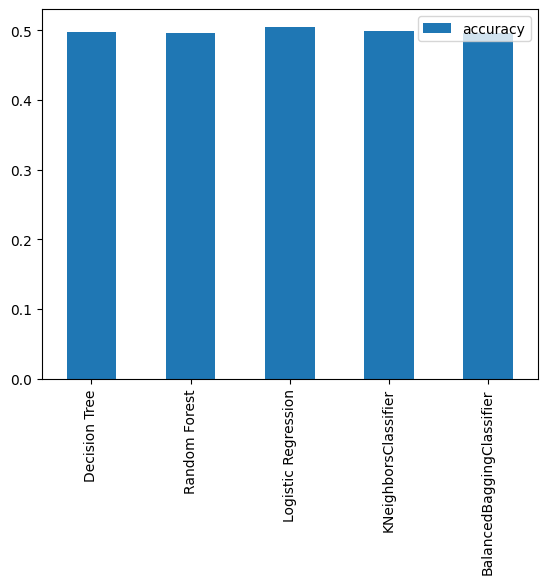

In [23]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Since none of the classification models worked good . I decided to build and train a simple neural network


##Simple feed forward neural network

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/10
1969/1969 - 11s - loss: 0.6951 - accuracy: 0.4966 - val_loss: 0.6948 - val_accuracy: 0.4884 - 11s/epoch - 5ms/step
Epoch 2/10
1969/1969 - 5s - loss: 0.6935 - accuracy: 0.5063 - val_loss: 0.6946 - val_accuracy: 0.5001 - 5s/epoch - 3ms/step
Epoch 3/10
1969/1969 - 7s - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6935 - val_accuracy: 0.4886 - 7s/epoch - 3ms/step
Epoch 4/10
1969/1969 - 3s - loss: 0.6929 - accuracy: 0.5101 - val_loss: 0.6939 - val_accuracy: 0.4913 - 3s/epoch - 2ms/step
Epoch 5/10
1969/1969 - 3s - loss: 0.6929 - accuracy: 0.5110 - val_loss: 0.6951 - val_accuracy: 0.4941 - 3s/epoch - 2ms/step
Epoch 6/10
1969/1969 - 4s - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6943 - val_accuracy: 0.4909 - 4s/epoch - 2ms/step
Epoch 7/10
1969/1969 - 4s - loss: 0.6926 - accuracy: 0.5131 - val_loss: 0.6937 - val_accuracy: 0.4923 - 4s/epoch - 2ms/step
Epoch 8/10
1969/1969 - 3s - loss: 0.6926 - accuracy: 0.5149 - val_loss: 0.6941 - val_accuracy: 0.4973 - 3s/epoch - 2ms/step
Epoch 

In [25]:
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_binary))

469/469 [==============================] - 1s 2ms/step
Accuracy: 0.50
              precision    recall  f1-score   support

           0       0.50      0.70      0.59      7542
           1       0.50      0.30      0.38      7458

    accuracy                           0.50     15000
   macro avg       0.50      0.50      0.48     15000
weighted avg       0.50      0.50      0.48     15000



Even the neural network did not gave me satisfactory result...I decided to add more features in the dataset
# More Feature Engineering

In [26]:
df['Total_Bill_Amount'] = df.groupby('CustomerID')['Monthly_Bill'].transform('sum')

# Calculate Average Monthly Bill
df['Average_Monthly_Bill'] = df.groupby('CustomerID')['Monthly_Bill'].transform('mean')

# Calculate Monthly Usage to Bill Ratio
df['Monthly_Usage_to_Bill_Ratio'] = df['Total_Usage_GB'] / df['Monthly_Bill']

# Create Age Group categories
bins = [18, 25, 35, 45, 55, 65, 100]  # Define age group bins
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']  # Define age group labels
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [27]:
df.head()

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Bill_Amount,Average_Monthly_Bill,Monthly_Usage_to_Bill_Ratio,Age_Group
0,1,63,1,2,17,73.36,236,0,73.36,73.36,3.217012,56-65
1,2,62,0,4,1,48.76,172,0,48.76,48.76,3.527482,56-65
2,3,24,0,2,5,85.47,460,0,85.47,85.47,5.382005,18-25
3,4,36,0,3,3,97.94,297,1,97.94,97.94,3.032469,36-45
4,5,46,0,3,19,58.14,266,0,58.14,58.14,4.575163,46-55


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   CustomerID                   100000 non-null  int64   
 1   Age                          100000 non-null  int64   
 2   Gender                       100000 non-null  int64   
 3   Location                     100000 non-null  int64   
 4   Subscription_Length_Months   100000 non-null  int64   
 5   Monthly_Bill                 100000 non-null  float64 
 6   Total_Usage_GB               100000 non-null  int64   
 7   Churn                        100000 non-null  int64   
 8   Total_Bill_Amount            100000 non-null  float64 
 9   Average_Monthly_Bill         100000 non-null  float64 
 10  Monthly_Usage_to_Bill_Ratio  100000 non-null  float64 
 11  Age_Group                    98161 non-null   category
dtypes: category(1), float64(4), int64(7)
memory u

<ipython-input-29-244b00116640>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


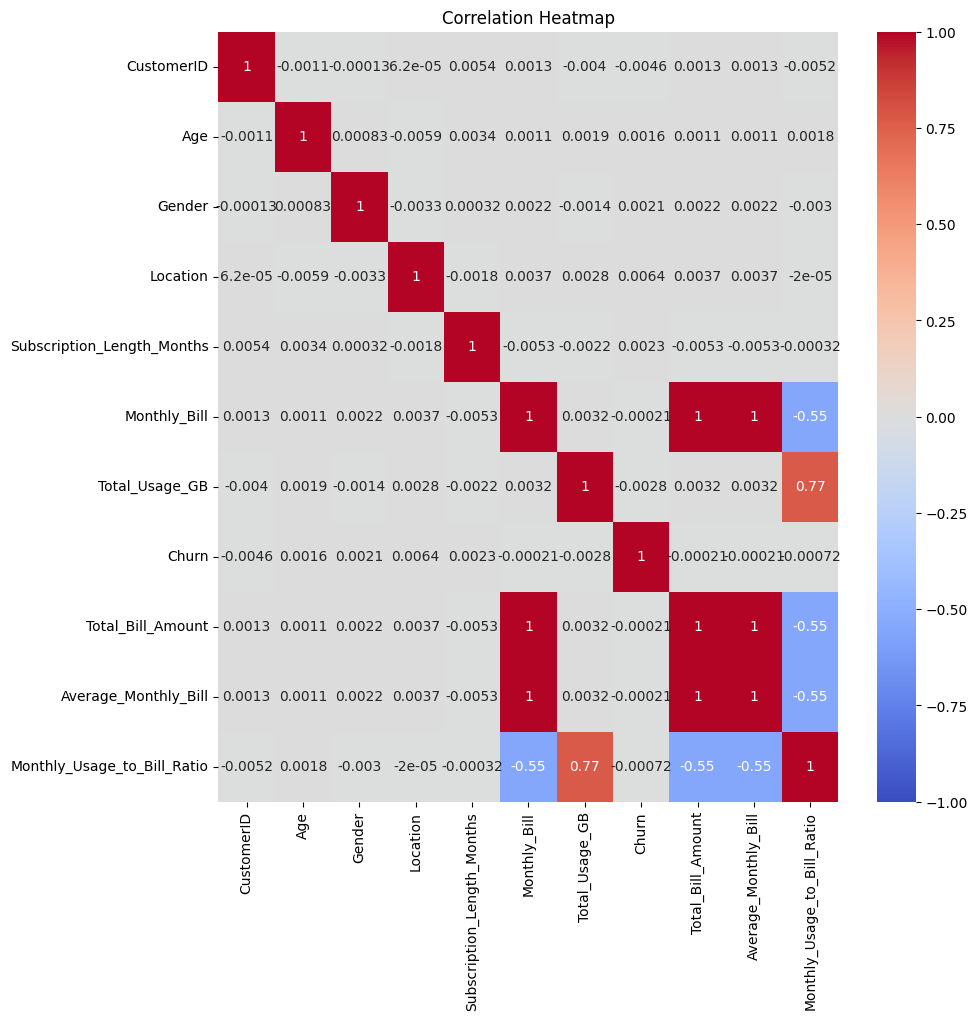

In [29]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

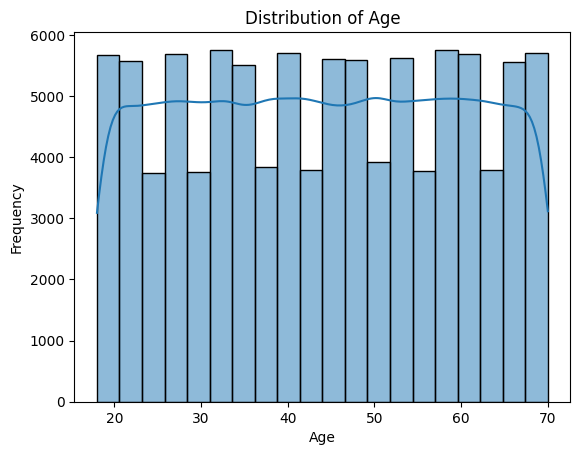

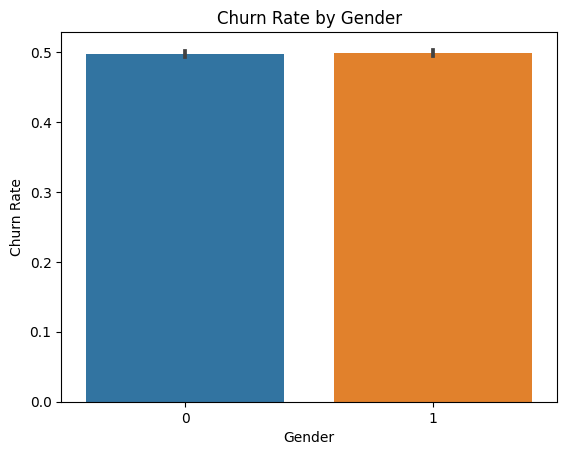

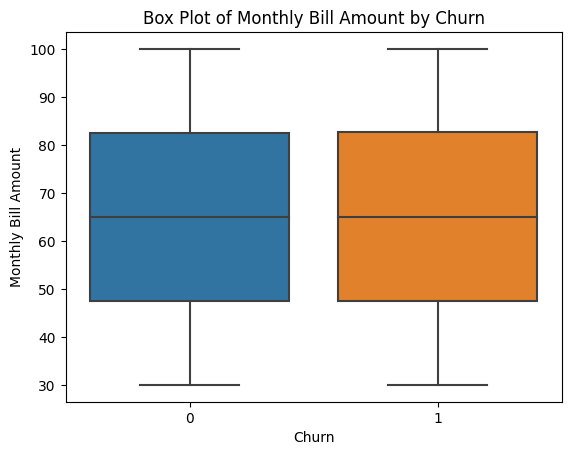

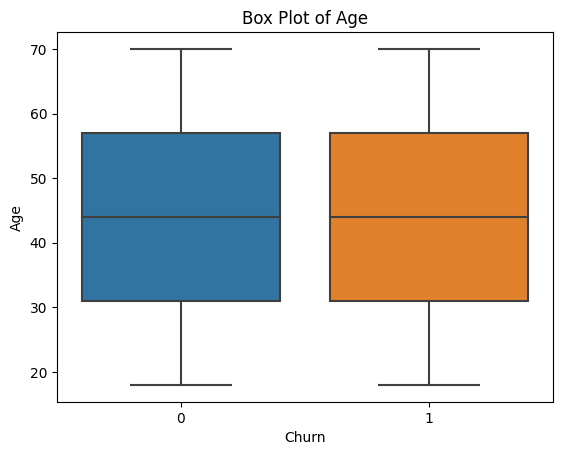

In [30]:
#Plotting some  graphs
sns.histplot(df['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

sns.barplot(x='Gender', y='Churn', data=df)
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')
plt.show()

sns.boxplot(x='Churn', y='Monthly_Bill', data=df)
plt.xlabel('Churn')
plt.ylabel('Monthly Bill Amount')
plt.title('Box Plot of Monthly Bill Amount by Churn')
plt.show()

sns.boxplot(x='Churn', y='Age', data=df)
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Box Plot of Age')
plt.show()

In [31]:
df.head(20)

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Bill_Amount,Average_Monthly_Bill,Monthly_Usage_to_Bill_Ratio,Age_Group
0,1,63,1,2,17,73.36,236,0,73.36,73.36,3.217012,56-65
1,2,62,0,4,1,48.76,172,0,48.76,48.76,3.527482,56-65
2,3,24,0,2,5,85.47,460,0,85.47,85.47,5.382005,18-25
3,4,36,0,3,3,97.94,297,1,97.94,97.94,3.032469,36-45
4,5,46,0,3,19,58.14,266,0,58.14,58.14,4.575163,46-55
5,6,67,1,4,15,82.65,456,1,82.65,82.65,5.517241,65+
6,7,30,0,0,3,73.79,269,0,73.79,73.79,3.645480,26-35
7,8,67,0,3,1,97.70,396,1,97.70,97.70,4.053224,65+
8,9,20,0,3,10,42.45,150,1,42.45,42.45,3.533569,18-25
9,10,53,0,2,12,64.49,383,1,64.49,64.49,5.938905,46-55


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   CustomerID                   100000 non-null  int64   
 1   Age                          100000 non-null  int64   
 2   Gender                       100000 non-null  int64   
 3   Location                     100000 non-null  int64   
 4   Subscription_Length_Months   100000 non-null  int64   
 5   Monthly_Bill                 100000 non-null  float64 
 6   Total_Usage_GB               100000 non-null  int64   
 7   Churn                        100000 non-null  int64   
 8   Total_Bill_Amount            100000 non-null  float64 
 9   Average_Monthly_Bill         100000 non-null  float64 
 10  Monthly_Usage_to_Bill_Ratio  100000 non-null  float64 
 11  Age_Group                    98161 non-null   category
dtypes: category(1), float64(4), int64(7)
memory u

In [33]:
# Split the data into features (X) and target (y)
X = df.drop(['Churn', 'CustomerID', 'Age_Group'], axis=1)
y = df['Churn']

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
#fitting the function and training above models .
for model_name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[model_name] = model.score(X_test, y_test)

In [36]:
model_scores

{'Decision Tree': 0.4928,
 'Random Forest': 0.49795,
 'Logistic Regression': 0.5004,
 'KNeighborsClassifier': 0.49625,
 'BalancedBaggingClassifier': 0.50515}

#Building a multi layered Neural Network

In [37]:
# Build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)


#Predicting using the neural network
y_pred_prob = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)

#Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Epoch 1/50
1000/1000 - 3s - loss: 0.6941 - accuracy: 0.5025 - val_loss: 0.6942 - val_accuracy: 0.4989 - 3s/epoch - 3ms/step
Epoch 2/50
1000/1000 - 2s - loss: 0.6935 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.5041 - 2s/epoch - 2ms/step
Epoch 3/50
1000/1000 - 5s - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6934 - val_accuracy: 0.4972 - 5s/epoch - 5ms/step
Epoch 4/50
1000/1000 - 3s - loss: 0.6931 - accuracy: 0.5051 - val_loss: 0.6939 - val_accuracy: 0.4960 - 3s/epoch - 3ms/step
Epoch 5/50
1000/1000 - 2s - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6933 - val_accuracy: 0.4981 - 2s/epoch - 2ms/step
Epoch 6/50
1000/1000 - 2s - loss: 0.6931 - accuracy: 0.5055 - val_loss: 0.6933 - val_accuracy: 0.5034 - 2s/epoch - 2ms/step
Epoch 7/50
1000/1000 - 2s - loss: 0.6932 - accuracy: 0.5054 - val_loss: 0.6935 - val_accuracy: 0.4958 - 2s/epoch - 2ms/step
625/625 [==============================] - 1s 1ms/step
Accuracy: 0.49945
Precision: 0.49512353706111834
Recall: 0.4605382521923193
F

Conclusion : The data isn't enough to generate a relation between churning of customers. We need to add more data features some features may inlcude
* Customer Activity: If you have data on customer activity or engagement (e.g., number of logins, click-through rates), consider adding these metrics as features.

* Customer Complaints/Issues: If available, include data on customer complaints or issues, such as the number of support tickets opened or the types of issues reported.

* Customer Satisfaction Scores: If we have customer satisfaction survey data, include satisfaction scores as features.